# Neural Network + Facebook Prophet
> https://www.kaggle.com/code/gcmadhan/amazon-stock-prediction-nn-fbprophet/notebook

## Import libraries

In [188]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import os

In [189]:
for dirname, _, filenames in os.walk('D:/kaggle/jpx-prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/kaggle/jpx-prediction\stock_list.csv
D:/kaggle/jpx-prediction\data_specifications\options_spec.csv
D:/kaggle/jpx-prediction\data_specifications\stock_fin_spec.csv
D:/kaggle/jpx-prediction\data_specifications\stock_list_spec.csv
D:/kaggle/jpx-prediction\data_specifications\stock_price_spec.csv
D:/kaggle/jpx-prediction\data_specifications\trades_spec.csv
D:/kaggle/jpx-prediction\example_test_files\financials.csv
D:/kaggle/jpx-prediction\example_test_files\options.csv
D:/kaggle/jpx-prediction\example_test_files\sample_submission.csv
D:/kaggle/jpx-prediction\example_test_files\secondary_stock_prices.csv
D:/kaggle/jpx-prediction\example_test_files\stock_prices.csv
D:/kaggle/jpx-prediction\example_test_files\trades.csv
D:/kaggle/jpx-prediction\jpx_tokyo_market_prediction\__init__.py
D:/kaggle/jpx-prediction\jpx_tokyo_market_prediction\competition.cpython-37m-x86_64-linux-gnu.so
D:/kaggle/jpx-prediction\supplemental_files\financials.csv
D:/kaggle/jpx-prediction\supplemental_files\options.c

## Read Stock Prices

In [190]:
df=pd.read_csv('D:/kaggle/jpx-prediction/train_files/stock_prices.csv')
df.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


### Only read one security code

In [191]:
train = df[df['SecuritiesCode']==6474].reset_index(drop=True)
train

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_6474,2017-01-04,6474,513.0,535.0,513.0,534.0,1683000,1.0,NaN,False,-0.009328
1,20170105_6474,2017-01-05,6474,542.0,542.0,530.0,536.0,1451000,1.0,NaN,False,-0.007533
2,20170106_6474,2017-01-06,6474,530.0,534.0,527.0,531.0,1064000,1.0,NaN,False,0.020873
3,20170110_6474,2017-01-10,6474,526.0,532.0,522.0,527.0,1434000,1.0,NaN,False,0.031599
4,20170111_6474,2017-01-11,6474,532.0,540.0,529.0,538.0,1036000,1.0,NaN,False,-0.023423
...,...,...,...,...,...,...,...,...,...,...,...,...
1197,20211129_6474,2021-11-29,6474,3910.0,3935.0,3850.0,3875.0,165000,1.0,NaN,False,0.014249
1198,20211130_6474,2021-11-30,6474,3930.0,4020.0,3860.0,3860.0,122000,1.0,NaN,False,0.010217
1199,20211201_6474,2021-12-01,6474,3860.0,3930.0,3815.0,3915.0,79800,1.0,NaN,False,0.027813
1200,20211202_6474,2021-12-02,6474,3880.0,3965.0,3880.0,3955.0,79500,1.0,NaN,False,-0.001230


### Drop RowId Column

In [192]:
train.drop('RowId', axis=1, inplace=True)
train

,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,2017-01-04,6474,513.0,535.0,513.0,534.0,1683000,1.0,NaN,False,-0.009328
1,2017-01-05,6474,542.0,542.0,530.0,536.0,1451000,1.0,NaN,False,-0.007533
2,2017-01-06,6474,530.0,534.0,527.0,531.0,1064000,1.0,NaN,False,0.020873
3,2017-01-10,6474,526.0,532.0,522.0,527.0,1434000,1.0,NaN,False,0.031599
4,2017-01-11,6474,532.0,540.0,529.0,538.0,1036000,1.0,NaN,False,-0.023423
...,...,...,...,...,...,...,...,...,...,...,...
1197,2021-11-29,6474,3910.0,3935.0,3850.0,3875.0,165000,1.0,NaN,False,0.014249
1198,2021-11-30,6474,3930.0,4020.0,3860.0,3860.0,122000,1.0,NaN,False,0.010217
1199,2021-12-01,6474,3860.0,3930.0,3815.0,3915.0,79800,1.0,NaN,False,0.027813
1200,2021-12-02,6474,3880.0,3965.0,3880.0,3955.0,79500,1.0,NaN,False,-0.001230


## Surface Level Analysis

In [193]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1202 non-null   object 
 1   SecuritiesCode    1202 non-null   int64  
 2   Open              1201 non-null   float64
 3   High              1201 non-null   float64
 4   Low               1201 non-null   float64
 5   Close             1201 non-null   float64
 6   Volume            1202 non-null   int64  
 7   AdjustmentFactor  1202 non-null   float64
 8   ExpectedDividend  10 non-null     float64
 9   SupervisionFlag   1202 non-null   bool   
 10  Target            1202 non-null   float64
dtypes: bool(1), float64(7), int64(2), object(1)
memory usage: 95.2+ KB


In [194]:
train.describe()

,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,Target
count,1202.0,1201.000000,1201.000000,1201.000000,1201.000000,1.202000e+03,1202.000000,10.000000,1202.000000
mean,6474.0,3281.142381,3320.412157,3238.601166,3279.439634,5.262958e+05,1.007488,36.000000,0.000048
std,0.0,1762.678471,1782.223667,1740.994399,1761.685244,8.928334e+05,0.259591,46.714261,0.023010
min,6474.0,513.000000,532.000000,511.000000,516.000000,0.000000e+00,1.000000,0.000000,-0.179019
25%,6474.0,716.000000,723.000000,710.000000,717.000000,5.980000e+04,1.000000,0.000000,-0.013007
50%,6474.0,4190.000000,4235.000000,4145.000000,4185.000000,9.790000e+04,1.000000,5.000000,0.000000
75%,6474.0,4595.000000,4650.000000,4540.000000,4605.000000,8.975000e+05,1.000000,87.500000,0.013354
max,6474.0,5730.000000,5790.000000,5630.000000,5680.000000,1.091500e+07,10.000000,100.000000,0.142857


In [195]:
train.isnull().sum()

Date                   0
SecuritiesCode         0
Open                   1
High                   1
Low                    1
Close                  1
Volume                 0
AdjustmentFactor       0
ExpectedDividend    1192
SupervisionFlag        0
Target                 0
dtype: int64

In [196]:
train.shape

(1202, 11)

In [197]:
np.round(train.median(), 2)

SecuritiesCode       6474.0
Open                 4190.0
High                 4235.0
Low                  4145.0
Close                4185.0
Volume              97900.0
AdjustmentFactor        1.0
ExpectedDividend        5.0
SupervisionFlag         0.0
Target                  0.0
dtype: float64

### Convert String Date to Datetime Date

In [198]:
train['Date']=pd.to_datetime(train['Date'])

In [199]:
print("Minimum date value : {}".format(train['Date'].min()))
print("Maximum date value : {}".format(train['Date'].max()))

Minimum date value : 2017-01-04 00:00:00
Maximum date value : 2021-12-03 00:00:00


## Exploratory Data Analysis

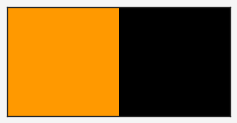

In [200]:
#importing ploting libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
colors = ['#FF9900','#000000']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
sns.palplot(colors, size=2)

Text(0.5, 1.0, 'Security Code 6474 Stock Value Changes Since 2017')

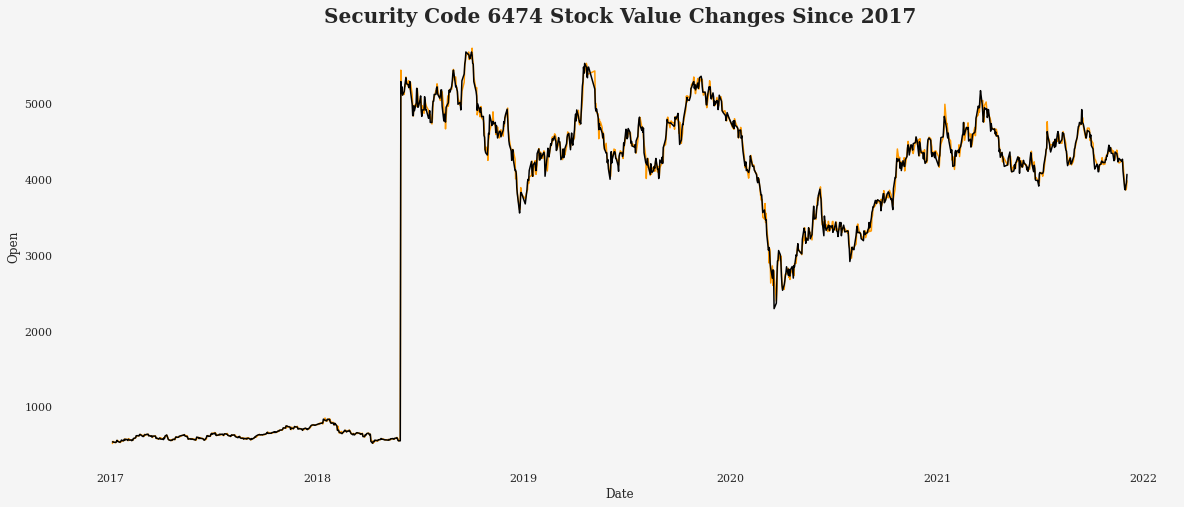

In [201]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=train, x='Date',y='Open')
ax=sns.lineplot(data=train, x='Date',y='Close', color=colors[1]);
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

plt.title("Security Code 6474 Stock Value Changes Since 2017", size=20, weight='bold')

### Observations
- Big spike in price in 2018

In [202]:
train["AdjustmentFactor"].unique()

array([ 1., 10.])

In [203]:
train[train["AdjustmentFactor"]<=10.0]

,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,2017-01-04,6474,513.0,535.0,513.0,534.0,1683000,1.0,NaN,False,-0.009328
1,2017-01-05,6474,542.0,542.0,530.0,536.0,1451000,1.0,NaN,False,-0.007533
2,2017-01-06,6474,530.0,534.0,527.0,531.0,1064000,1.0,NaN,False,0.020873
3,2017-01-10,6474,526.0,532.0,522.0,527.0,1434000,1.0,NaN,False,0.031599
4,2017-01-11,6474,532.0,540.0,529.0,538.0,1036000,1.0,NaN,False,-0.023423
...,...,...,...,...,...,...,...,...,...,...,...
1197,2021-11-29,6474,3910.0,3935.0,3850.0,3875.0,165000,1.0,NaN,False,0.014249
1198,2021-11-30,6474,3930.0,4020.0,3860.0,3860.0,122000,1.0,NaN,False,0.010217
1199,2021-12-01,6474,3860.0,3930.0,3815.0,3915.0,79800,1.0,NaN,False,0.027813
1200,2021-12-02,6474,3880.0,3965.0,3880.0,3955.0,79500,1.0,NaN,False,-0.001230


### Adjust the prices before May 28, 2018

In [204]:
train["Open"] = np.where(temp_df["Date"] <= '2018-05-28', train["Open"]*10, train["Open"])
train["High"] = np.where(temp_df["Date"] <= '2018-05-28', train["High"]*10, train["High"])
train["Low"] = np.where(temp_df["Date"] <= '2018-05-28', train["Low"]*10, train["Low"])
train["Close"] = np.where(temp_df["Date"] <= '2018-05-28', train["Close"]*10, train["Close"])

Text(0.5, 1.0, 'Security Code 6474 Stock Value Changes Since 2017')

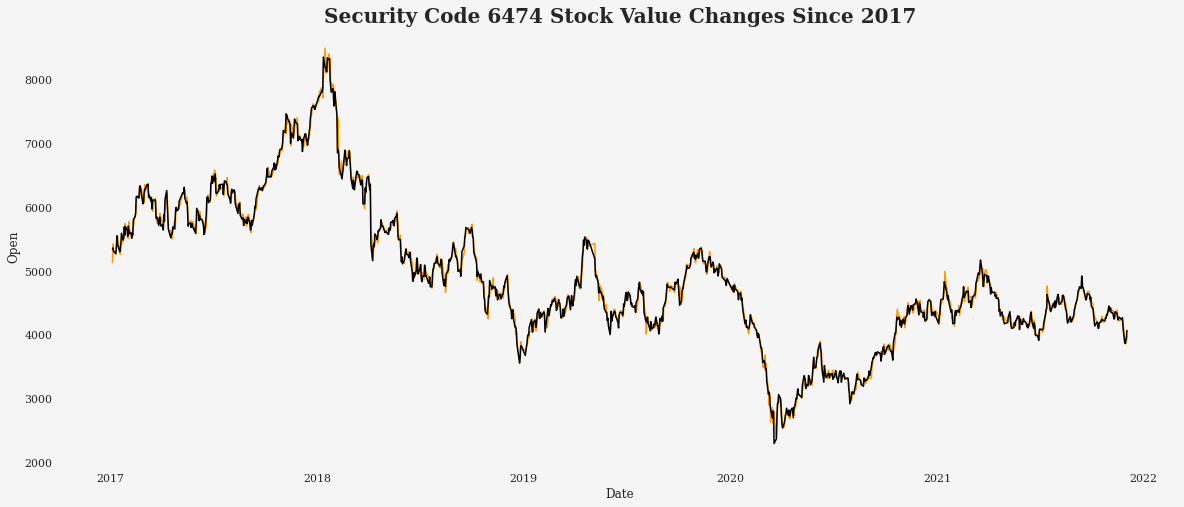

In [205]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=train, x='Date',y='Open')
ax=sns.lineplot(data=train, x='Date',y='Close', color=colors[1]);
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

plt.title("Security Code 6474 Stock Value Changes Since 2017", size=20, weight='bold')

Text(0.5, 1.0, 'Security Code 6474 Stock Volume')

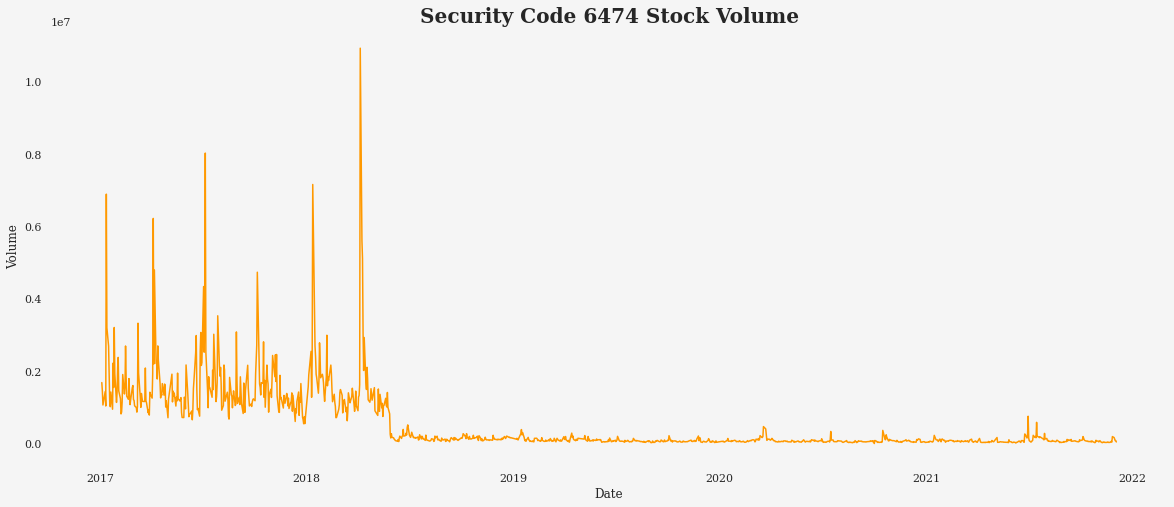

In [206]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=train, x='Date',y='Volume')
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)
plt.title("Security Code 6474 Stock Volume", size=20, weight='bold')

## Univariated Analysis

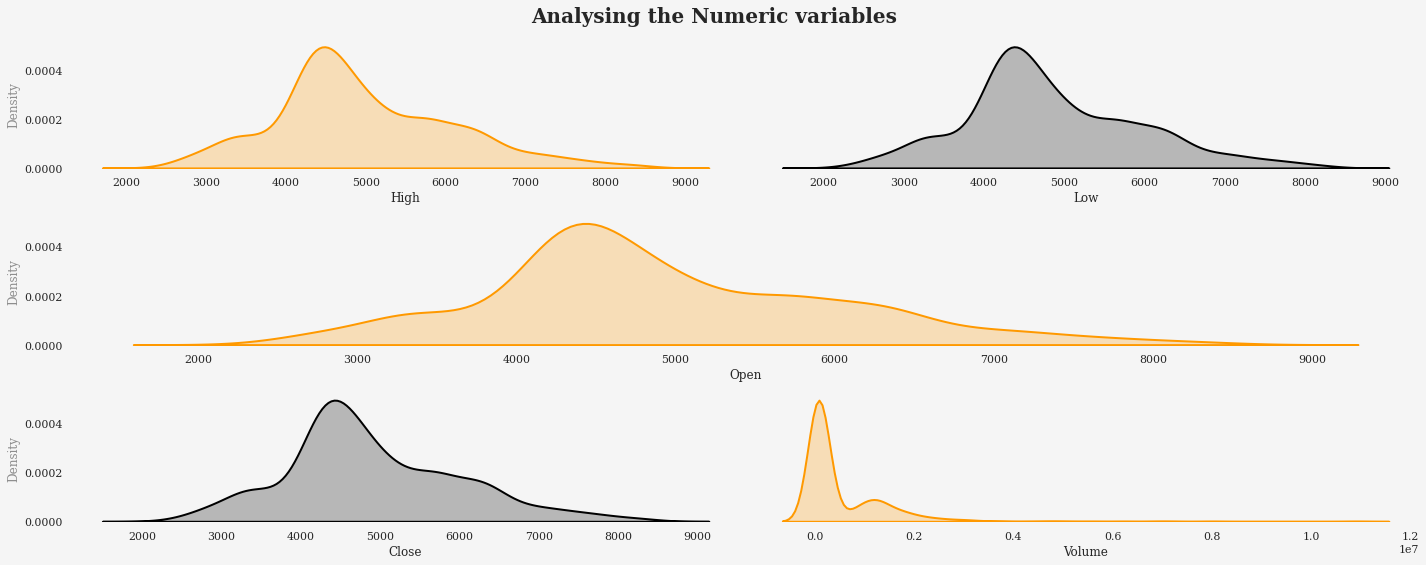

In [207]:
#integer columns
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Analysing the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.kdeplot(train['High'], ax=ax['A'], color=colors[0], fill=True, linewidth=2)
sns.kdeplot(train['Low'], ax=ax['B'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(train['Open'], ax=ax['C'], color=colors[0],fill=True, linewidth=2)
sns.kdeplot(train['Close'], ax=ax['D'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(train['Volume'], ax=ax['E'], color=colors[0],fill=True, linewidth=2)
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

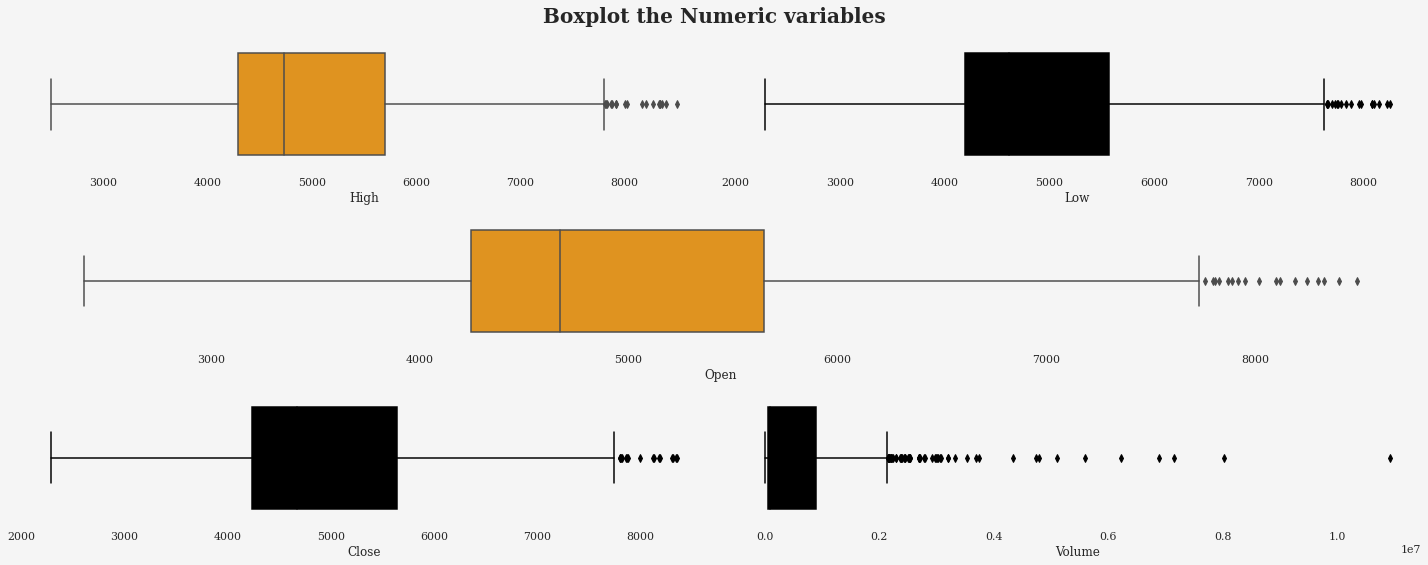

In [208]:
#integer columns
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Boxplot the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.boxplot(train['High'], ax=ax['A'], color=colors[0])
sns.boxplot(train['Low'], ax=ax['B'], color=colors[1])
sns.boxplot(train['Open'], ax=ax['C'], color=colors[0])
sns.boxplot(train['Close'], ax=ax['D'], color=colors[1])
sns.boxplot(train['Volume'], ax=ax['E'], color=colors[1])
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

## Bivariated and Multivariated Analysis

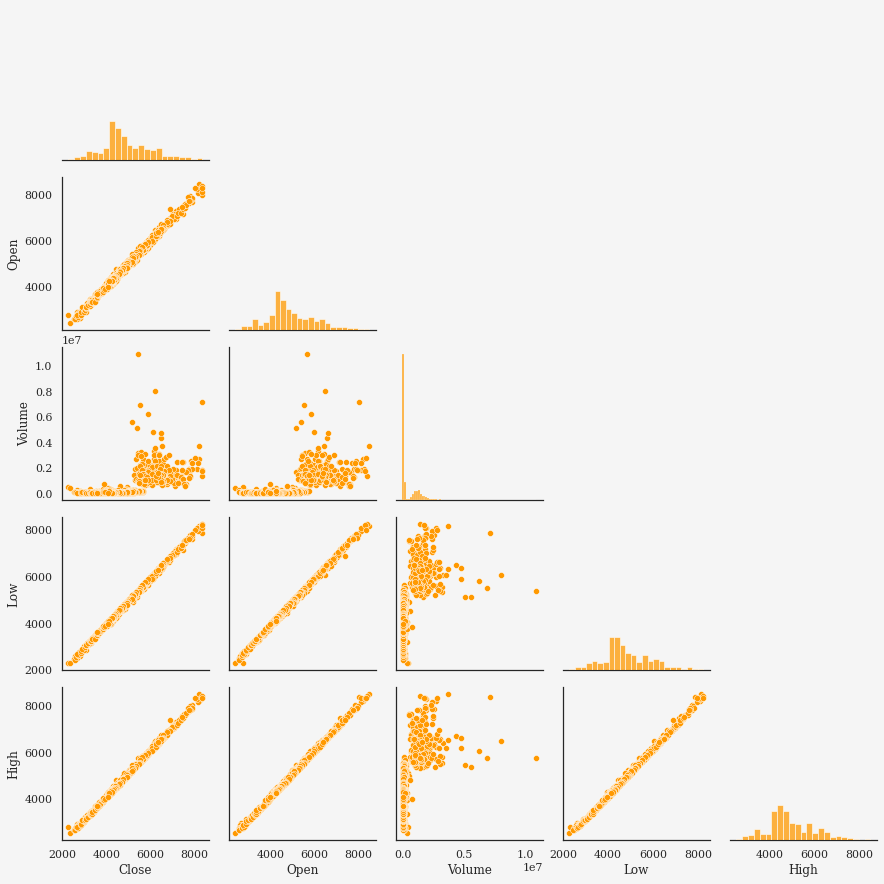

In [209]:
sns.pairplot(train[{"Open", "Close", "Low", "High", "Volume"}],corner=True)

In [210]:
train[{"Open", "Close", "Low", "High", "Volume"}].corr()["Close"]

Close     1.000000
Open      0.997360
Volume    0.627258
Low       0.998978
High      0.998830
Name: Close, dtype: float64

## Hypothesis Test to Find the Normality in the Dataset
See whether or not we can model the distribution as a normal distribution

In [211]:
from scipy.stats import levene, shapiro
int_cols=train.select_dtypes(exclude='object').columns.to_list()

for i in int_cols:
    _, p_value=shapiro(train[i])
    if p_value<0.05:
        print("Feature {} is normally distributed".format(i))
    else:
        print("Feature {} is not normally distributed".format(i))
        
    print("Normalitiy test p_value for feature -  {} is {}\n".format(i,np.round(p_value,3)))

Feature Date is normally distributed
Normalitiy test p_value for feature -  Date is 0.0

Feature SecuritiesCode is not normally distributed
Normalitiy test p_value for feature -  SecuritiesCode is 1.0

Feature Open is not normally distributed
Normalitiy test p_value for feature -  Open is 1.0

Feature High is not normally distributed
Normalitiy test p_value for feature -  High is 1.0

Feature Low is not normally distributed
Normalitiy test p_value for feature -  Low is 1.0

Feature Close is not normally distributed
Normalitiy test p_value for feature -  Close is 1.0

Feature Volume is normally distributed
Normalitiy test p_value for feature -  Volume is 0.0

Feature AdjustmentFactor is normally distributed
Normalitiy test p_value for feature -  AdjustmentFactor is 0.0

Feature ExpectedDividend is not normally distributed
Normalitiy test p_value for feature -  ExpectedDividend is 1.0

Feature SupervisionFlag is not normally distributed
Normalitiy test p_value for feature -  SupervisionF

## Correlation

<AxesSubplot:>

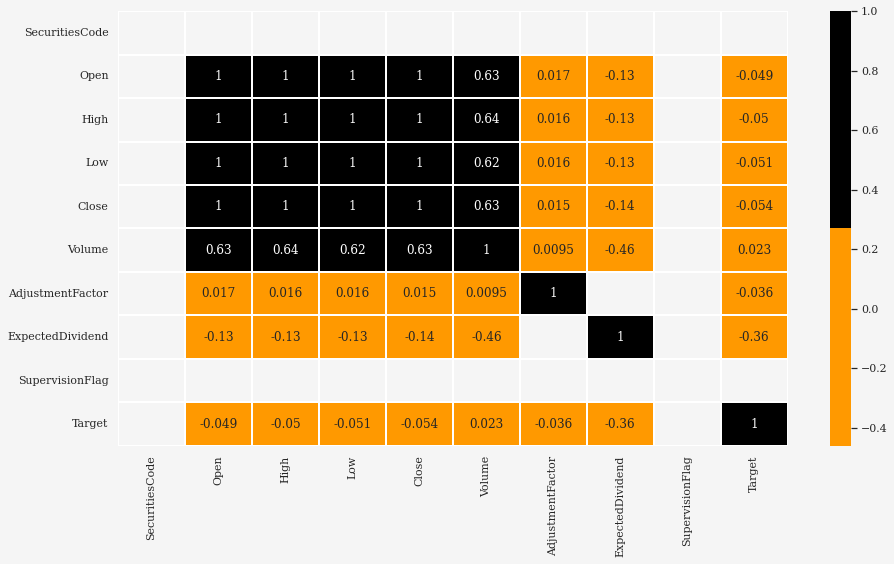

In [212]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), annot=True, cmap=[colors[0],colors[1]], linecolor='white', linewidth=2 )

## Fill in NaNs

In [213]:
train.isnull().sum()

Date                   0
SecuritiesCode         0
Open                   1
High                   1
Low                    1
Close                  1
Volume                 0
AdjustmentFactor       0
ExpectedDividend    1192
SupervisionFlag        0
Target                 0
dtype: int64

In [214]:
train[train["Open"].isnull()]

,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
913,2020-10-01,6474,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.024194


In [215]:
train[:][911:915]

,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
911,2020-09-29,6474,3850.0,3865.0,3780.0,3810.0,41100,1.0,NaN,False,0.000000
912,2020-09-30,6474,3815.0,3830.0,3680.0,3690.0,66600,1.0,NaN,False,0.008130
913,2020-10-01,6474,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.024194
914,2020-10-02,6474,3725.0,3765.0,3655.0,3720.0,84400,1.0,NaN,False,0.001312


### Average Open, High, Low, Close, Volume

In [216]:
train["Open"][913] = (train["Open"][914] + train["Open"][912])/2.0
train["High"][913] = (train["High"][914] + train["High"][912])/2.0
train["Low"][913] = (train["Low"][914] + train["Low"][912])/2.0
train["Close"][913] = (train["Close"][914] + train["Close"][912])/2.0
train["Volume"][913] = (train["Volume"][914] + train["Volume"][912])/2.0
train[:][911:915]

,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
911,2020-09-29,6474,3850.0,3865.0,3780.0,3810.0,41100,1.0,NaN,False,0.000000
912,2020-09-30,6474,3815.0,3830.0,3680.0,3690.0,66600,1.0,NaN,False,0.008130
913,2020-10-01,6474,3770.0,3797.5,3667.5,3705.0,75500,1.0,NaN,False,0.024194
914,2020-10-02,6474,3725.0,3765.0,3655.0,3720.0,84400,1.0,NaN,False,0.001312


### Recalculate target to match

In [217]:
train["Target"][911] = (temp_df["Close"][911] - temp_df["Close"][912])/temp_df["Close"][912]
train[:][911:915]

,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
911,2020-09-29,6474,3850.0,3865.0,3780.0,3810.0,41100,1.0,NaN,False,0.032520
912,2020-09-30,6474,3815.0,3830.0,3680.0,3690.0,66600,1.0,NaN,False,0.008130
913,2020-10-01,6474,3770.0,3797.5,3667.5,3705.0,75500,1.0,NaN,False,0.024194
914,2020-10-02,6474,3725.0,3765.0,3655.0,3720.0,84400,1.0,NaN,False,0.001312


## Train Test Split

In [218]:
X=train[['Volume','Open']]
y=train['Close']

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=False, random_state=42)

## Normalize Values

In [220]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Creation

### Linear Regression

In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
model = LinearRegression()
model.fit(X_train,y_train)
set_config(display='diagram')
pred=model.predict(X_test)
sc=np.round(model.score(X_test, y_test),2) * 100
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)

Accuracy score : 98.0 %
R2 Score : 0.98
Mean Squared error : 4627.54
Mean Absolute error : 4627.54


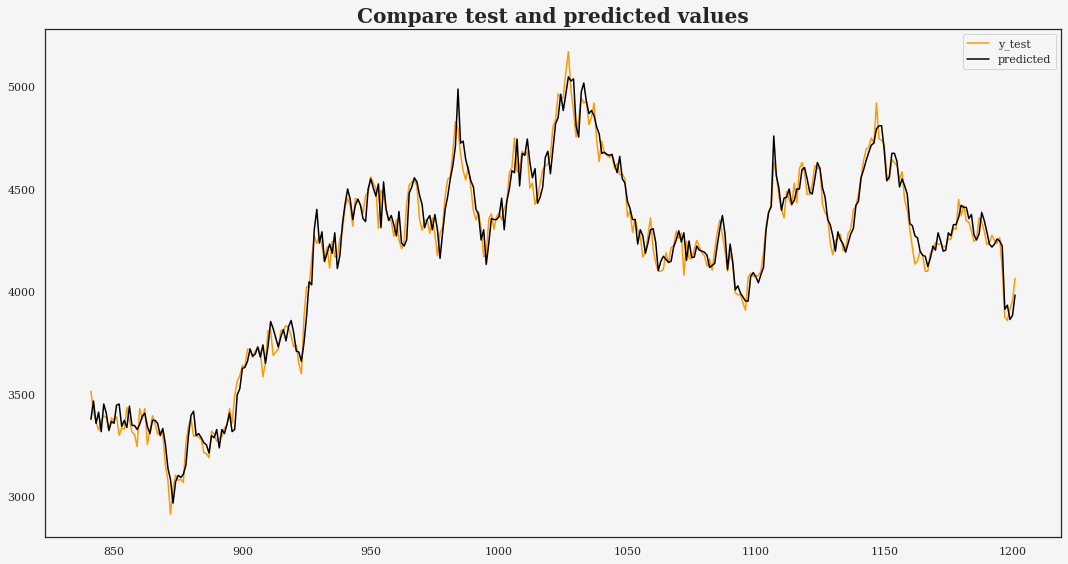

In [234]:
fig=plt.figure(figsize=(15,8))
p=pd.Series(pred, index=y_test.index)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test','predicted'])
# plt.legend(['Accuracy score : {} %'.format(sc)])
plt.title("Compare test and predicted values", size=20, weight='bold')
plt.tight_layout()
print('Accuracy score : {} %'.format(sc))
print('R2 Score : {}'.format(r2))
print('Mean Squared error : {}'.format(mse))
print('Mean Absolute error : {}'.format(mae))

### LSTM
> Dud

### Redo the train and test sets

In [247]:
# from sklearn.preprocessing import MinMaxScaler
data=train[['Open','Volume', 'Close']]
sc = StandardScaler()
scaled_data = sc.fit_transform(data)
data

,Open,Volume,Close
0,5130.0,1683000,5340.0
1,5420.0,1451000,5360.0
2,5300.0,1064000,5310.0
3,5260.0,1434000,5270.0
4,5320.0,1036000,5380.0
...,...,...,...
1197,3910.0,165000,3875.0
1198,3930.0,122000,3860.0
1199,3860.0,79800,3915.0
1200,3880.0,79500,3955.0


In [255]:
scaled_df = pd.DataFrame(scaled_data, columns=['Open','Volume', 'Close'])
scaled_df

,Open,Volume,Close
0,0.203330,1.296062,0.398236
1,0.467192,1.036097,0.416472
2,0.358008,0.602448,0.370883
3,0.321613,1.017048,0.334411
4,0.376205,0.571073,0.434708
...,...,...,...
1197,-0.906710,-0.404917,-0.937540
1198,-0.888513,-0.453100,-0.951217
1199,-0.952204,-0.500386,-0.901068
1200,-0.934006,-0.500723,-0.864596


In [257]:
X = scaled_df[['Open','Volume']]
y = scaled_df['Close']
X, y

(          Open    Volume
 0     0.203330  1.296062
 1     0.467192  1.036097
 2     0.358008  0.602448
 3     0.321613  1.017048
 4     0.376205  0.571073
 ...        ...       ...
 1197 -0.906710 -0.404917
 1198 -0.888513 -0.453100
 1199 -0.952204 -0.500386
 1200 -0.934006 -0.500723
 1201 -0.843019 -0.540726
 
 [1202 rows x 2 columns],
 0       0.398236
 1       0.416472
 2       0.370883
 3       0.334411
 4       0.434708
           ...   
 1197   -0.937540
 1198   -0.951217
 1199   -0.901068
 1200   -0.864596
 1201   -0.764299
 Name: Close, Length: 1202, dtype: float64)

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=False, random_state=42)

In [260]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the LSTM
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the LSTM to the Training set
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs = 100, batch_size = 32)

Epoch 1/100
27/27 [==============================] - 5s 49ms/step - loss: 1.0745 - val_loss: 0.8523
Epoch 2/100
27/27 [==============================] - 0s 13ms/step - loss: 0.4998 - val_loss: 0.2604
Epoch 3/100
27/27 [==============================] - 0s 11ms/step - loss: 0.1140 - val_loss: 0.0459
Epoch 4/100
27/27 [==============================] - 0s 10ms/step - loss: 0.0708 - val_loss: 0.0148
Epoch 5/100
27/27 [==============================] - 0s 10ms/step - loss: 0.0545 - val_loss: 0.0111
Epoch 6/100
27/27 [==============================] - 0s 11ms/step - loss: 0.0606 - val_loss: 0.0095
Epoch 7/100
27/27 [==============================] - 0s 13ms/step - loss: 0.0528 - val_loss: 0.0080
Epoch 8/100
27/27 [==============================] - 0s 11ms/step - loss: 0.0463 - val_loss: 0.0065
Epoch 9/100
27/27 [==============================] - 0s 10ms/step - loss: 0.0403 - val_loss: 0.0055
Epoch 10/100
27/27 [==============================] - 0s 10ms/step - loss: 0.0427 - val_loss: 0.0061

27/27 [==============================] - 0s 11ms/step - loss: 0.0206 - val_loss: 0.0043
Epoch 83/100
27/27 [==============================] - 0s 10ms/step - loss: 0.0244 - val_loss: 0.0060
Epoch 84/100
27/27 [==============================] - 0s 12ms/step - loss: 0.0258 - val_loss: 0.0057
Epoch 85/100
27/27 [==============================] - 0s 10ms/step - loss: 0.0212 - val_loss: 0.0057
Epoch 86/100
27/27 [==============================] - 0s 10ms/step - loss: 0.0241 - val_loss: 0.0080
Epoch 87/100
27/27 [==============================] - 0s 11ms/step - loss: 0.0236 - val_loss: 0.0051
Epoch 88/100
27/27 [==============================] - 0s 10ms/step - loss: 0.0242 - val_loss: 0.0046
Epoch 89/100
27/27 [==============================] - 0s 10ms/step - loss: 0.0238 - val_loss: 0.0047
Epoch 90/100
27/27 [==============================] - 0s 10ms/step - loss: 0.0207 - val_loss: 0.0054
Epoch 91/100
27/27 [==============================] - 0s 10ms/step - loss: 0.0232 - val_loss: 0.0040
Epo

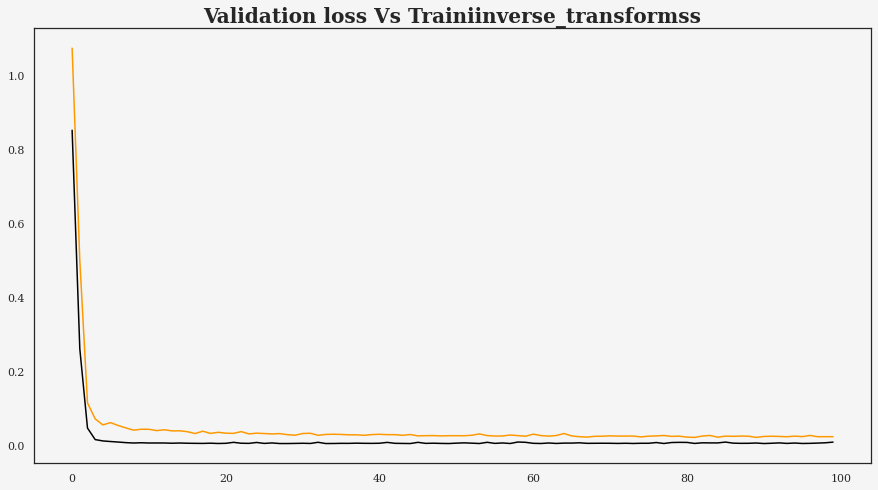

In [261]:
loss = pd.DataFrame(model.history.history)
fig=plt.figure(figsize=(15,8))
plt.title("Validation loss Vs Trainiinverse_transformss", size=20, weight='bold')
plt.plot(loss)

In [262]:
pred=model.predict(X_test)
test=pd.DataFrame(columns=['test','pred'])
test['test']=y_test
test['pred']=pred.flatten()
test

,test,pred
841,-1.265785,-1.512804
842,-1.356964,-1.436744
843,-1.402554,-1.529266
844,-1.439026,-1.485113
845,-1.397995,-1.569337
...,...,...
1197,-0.937540,-0.968402
1198,-0.951217,-0.956730
1199,-0.901068,-1.037652
1200,-0.864596,-1.017119


R2 Score : 0.96
Mean Squared error : 0.01
Mean Absolute error : 0.01


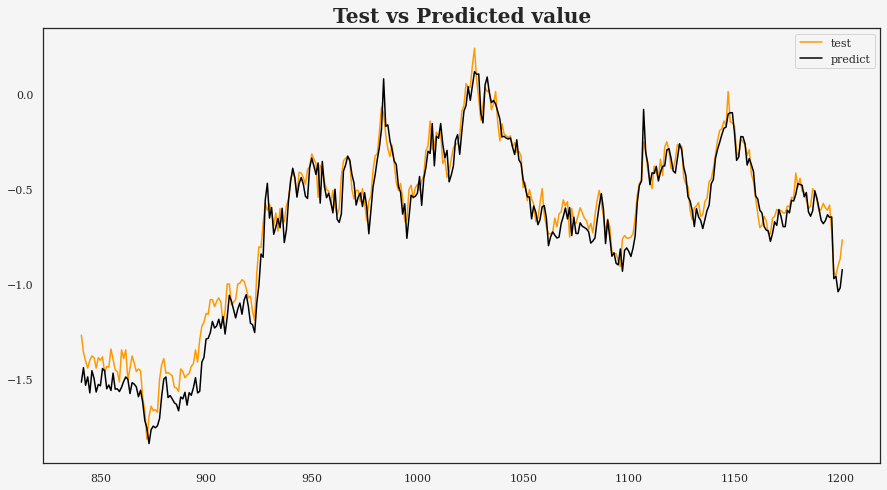

In [268]:
fig=plt.figure(figsize=(15,8))
plt.title("Test vs Predicted value", size=20, weight='bold')
plt.plot(test)
plt.legend(['test','predict'])
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)
print('R2 Score : {}'.format(r2))
print('Mean Squared error : {}'.format(mse))
print('Mean Absolute error : {}'.format(mae))

### FaceBook Prophet

In [277]:
from prophet import Prophet
df_p = train[['Date','Close']]
df_p.columns=['ds','y']

split_idx = round(df_p.index.max()*.7)
train = df_p.loc[df_p.index<=split_idx].copy()
test=df_p.loc[df_p.index>split_idx].copy()
train.set_index('ds',inplace=True)
test.set_index('ds',inplace=True)
train.reset_index(inplace=True)
test.reset_index(inplace=True)


# #Model creation
model=Prophet()
model.fit(train)

# #model prediction
pred=model.predict(test)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [278]:
test_pred=pd.DataFrame(columns=['ds','test','predict','pred_lower','pred_high'], index=test.index)
test_pred['test']=test['y']
test_pred['ds']=test['ds']
test_pred['predict']=pred['yhat']
test_pred['pred_lower']=pred['yhat_lower']
test_pred['pred_high']=pred['yhat_upper']

R2 Score : -37.27
Mean Squared error : 8378871.71
Mean Absolute error : 8378871.71


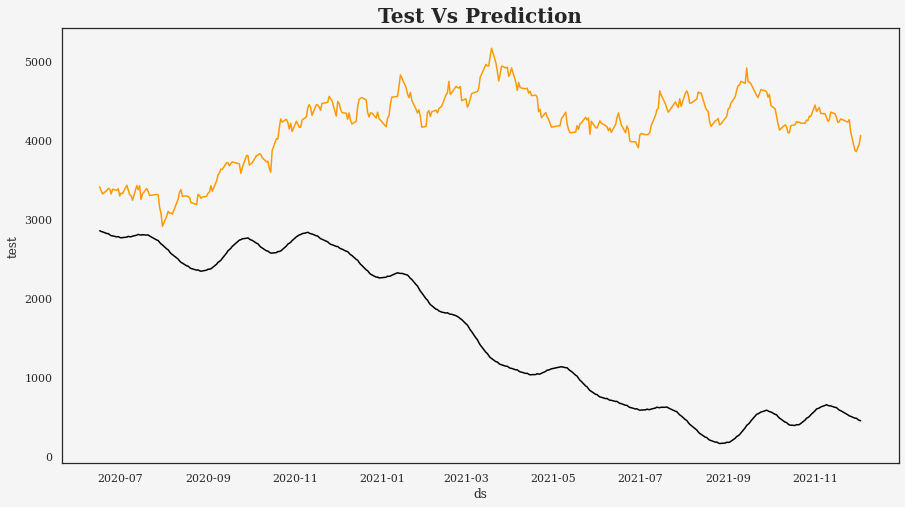

In [280]:
#plotting Test vs Predicted
fig=plt.figure(figsize=(15,8))
plt.title("Test Vs Prediction", size=20, weight='bold')
sns.lineplot(data=test_pred,x='ds',y='test')
sns.lineplot(data=test_pred,x='ds',y='predict')

r2=np.round(r2_score(test_pred['test'],test_pred['predict']),2)
mse=np.round(mean_squared_error(test_pred['test'],test_pred['predict']),2)
mae=np.round(mean_squared_error(test_pred['test'],test_pred['predict']),2)
print('R2 Score : {}'.format(r2))
print('Mean Squared error : {}'.format(mse))
print('Mean Absolute error : {}'.format(mae))

R2 Score : -37.27
Mean Squared error : 8378871.71
Mean Absolute error : 8378871.71


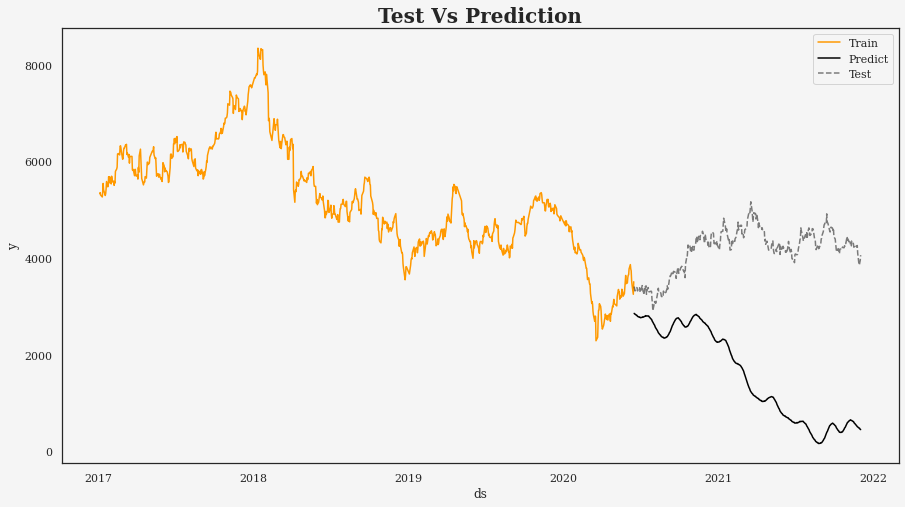

In [281]:
fig=plt.figure(figsize=(15,8))
plt.title("Test Vs Prediction", size=20, weight='bold')
sns.lineplot(data=train,x='ds',y='y')
sns.lineplot(data=test_pred,x='ds',y='predict')
sns.lineplot(data=test_pred,x='ds',y='test', alpha=0.5, ls='--', color='black')

r2=np.round(r2_score(test_pred['test'],test_pred['predict']),2)
mse=np.round(mean_squared_error(test_pred['test'],test_pred['predict']),2)
mae=np.round(mean_squared_error(test_pred['test'],test_pred['predict']),2)
print('R2 Score : {}'.format(r2))
print('Mean Squared error : {}'.format(mse))
print('Mean Absolute error : {}'.format(mae))
plt.legend(['Train','Predict','Test'])